# Data analysis



Initially I import the libraries that I need in order to make a connection to the drive folder.

In [ ]:
import zipfile
from shutil import copyfile
from google.colab import drive
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
copyfile('/content/gdrive/My Drive/Colab Notebooks/data_marketing_analytics_2023.zip', 'data_marketing.zip')
# Extract files
zipp = zipfile.ZipFile('data_marketing.zip')
zipp.extractall()
zipp.close()

I import the seven dataset that have been provided in order to investigate
their structure and to make a phase of Exploratory Data Analysis.

In [ ]:
addresses=pd.read_csv('tbl_addresses.csv')
customer_accounts=pd.read_csv('tbl_customer_accounts.csv')
customer_reviews=pd.read_csv('tbl_customer_reviews.csv')
customers=pd.read_csv('tbl_customers.csv')
labelled_reviews=pd.read_csv('tbl_labelled_reviews.csv')
orders=pd.read_csv("tbl_orders.csv")
products=pd.read_csv("tbl_products.csv")

# Addresses dataset

Check the info of the dataset and possible null values

In [ ]:
addresses.info()
addresses.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245425 entries, 0 to 245424
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   address_id   245425 non-null  int64  
 1   postal_code  245376 non-null  float64
 2   district     226359 non-null  object 
 3   region       238679 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.5+ MB


address_id         0
postal_code       49
district       19066
region          6746
dtype: int64

The addresses dataset contains multiple null values. In particular the variables: district and region have a large number of null values.

I convert the variables to string.

In [ ]:
addresses['postal_code'] = addresses['postal_code'].astype(str)
addresses['district']=addresses['district'].astype(str)
addresses['region']=addresses['region'].astype(str)
addresses['address_id']=addresses['address_id'].astype(str)


I drop the duplicates of the dataset

In [ ]:
addresses=addresses.drop_duplicates()

I delete the customer that have no postal code, since in all the cases who does not have a postal code presents null values also for the variables district and region.

In [ ]:
addresses[addresses.postal_code=="nan"]
new = addresses.drop(addresses[addresses.postal_code=="nan"].index)
new=addresses.drop(addresses[addresses.postal_code=="None"].index)

I use the postal code to derive the missing information about the district and the region

In [ ]:
a={}
for i in new.postal_code.unique():
      district=new.district[new.postal_code==i].iloc[0]
      region=new.region[new.postal_code==i].iloc[0]
      if district!="nan" or region!="nan":
        a[i]=[district,region]


When the district and the region contains the value Nan, I try to retrieve the information from the dictionary previously created. It contains the association between postal code and the values for district and region.

In [ ]:
for j in range(0,len(addresses)):
  if addresses.district.iloc[j]=="nan":
    if addresses.postal_code.iloc[j] in a.keys():
      district=a[addresses.postal_code.iloc[j]][0]
      addresses.district.iloc[j]= district
  if addresses.region.iloc[j]=="nan":
    if addresses.postal_code.iloc[j] in a.keys():
      region=a[addresses.postal_code.iloc[j]][1]
      addresses.region.iloc[j]= region


In [ ]:
addresses.district.loc[addresses["district"]=="nan"] = "Not Specified"


In [ ]:
addresses.region.loc[addresses["region"]=="nan"] = "Not Specified"


Hovewer there are some cases in which the postal code does not lead to the
values of district and region. In that cases I substitute the nan values with the string "Not Specified"

In [ ]:
conteggi = addresses.region.value_counts()
conteggi

LOMBARDIA                47550
LAZIO                    20101
VENETO                   14186
CAMPANIA                 12887
PIEMONTE                 11745
SICILIA                  10783
EMILIA ROMAGNA            9606
PUGLIA                    8790
TOSCANA                   6217
LIGURIA                   3953
ABRUZZO                   3255
FRIULI VENEZIA GIULIA     2785
UMBRIA                    2694
Not Specified              628
MARCHE                     614
CALABRIA                   488
BASILICATA                 467
TRENTINO ALTO ADIGE        350
SARDEGNA                   297
MOLISE                     220
VALLE D'AOSTA              149
Name: region, dtype: int64

The majority of addresses correspond to the Lombardia region, followed by the Lazio. Valle D'Aosta is the region with the smallest representativity.

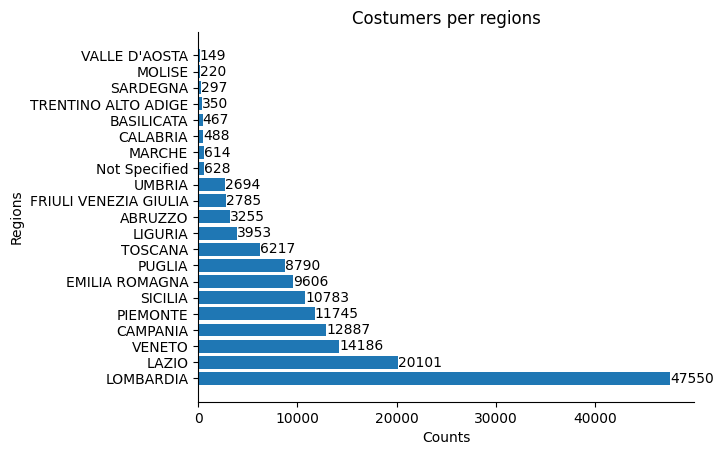

In [ ]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
bars = ax.barh(conteggi.index,conteggi)

ax.bar_label(bars)
# label
plt.xlabel('Counts')
plt.ylabel('Regions')
plt.title('Costumers per regions')
# plot visualization

ax.spines[['right', 'top']].set_visible(False)

plt.show()

# Customers dataset

I drop the duplicates of the customers dataset and I check for Nan Values.

In [ ]:
customers.info()
customers=customers.drop_duplicates()
customers.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140946 entries, 0 to 140945
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          140946 non-null  int64  
 1   address_id           140946 non-null  int64  
 2   birthdate            140946 non-null  object 
 3   gender               140946 non-null  object 
 4   job_type             4295 non-null    object 
 5   email_provider       139111 non-null  object 
 6   flag_phone_provided  129675 non-null  float64
 7   flag_privacy         140946 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 7.7+ MB


customer_id                 0
address_id                  0
birthdate                   0
gender                      0
job_type               136651
email_provider           1835
flag_phone_provided     11271
flag_privacy                0
dtype: int64

The variables "job_type" and "flag_phone_provided" are characterised by a large number of null values. I substitute the value Nan with "Not Specified" for the job_type and email provider variables. Instead I insert the value 999 for the variable flag_phone_provided in the case it contains a Nan value.

In [ ]:
customers.job_type[customers.job_type.isna()==True]= 'Not Specified'

In [ ]:
customers.email_provider=customers.email_provider[customers.email_provider.isna()==True]="Not Specified"
customers.flag_phone_provided[customers.flag_phone_provided.isna()==True]="999"


I  convert all the variables, excluded flag_privacy(boolean) to string.

In [ ]:
customers['customer_id']=customers['customer_id'].astype(str)
customers['address_id']=customers['address_id'].astype(str)
customers['birthdate']= pd.to_datetime(customers['birthdate'])
customers['gender']=customers['gender'].astype(str)
customers['job_type']=customers['job_type'].astype(str)
customers['email_provider']=customers['email_provider'].astype(str)
customers['flag_phone_provided']=customers['flag_phone_provided'].astype(str)





I make the join between the customers and the addresses table
based on the variable address_id

In [ ]:
df = pd.merge(customers, addresses, on=['address_id'])

In [ ]:
df

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy,postal_code,district,region
0,891057,863914,2001-10-22,F,Not Specified,Not Specified,1.0,True,10035.0,TO,PIEMONTE
1,655484,639856,2001-04-30,M,Not Specified,Not Specified,1.0,False,71010.0,FG,PUGLIA
2,514958,494806,2001-01-01,M,Not Specified,Not Specified,1.0,True,42.0,RM,LAZIO
3,398355,377261,2000-03-09,M,Not Specified,Not Specified,1.0,True,36050.0,VI,VENETO
4,23808,20227,1999-11-21,F,Not Specified,Not Specified,1.0,True,60041.0,AN,MARCHE
...,...,...,...,...,...,...,...,...,...,...,...
138831,449222,428121,1945-05-30,F,Not Specified,Not Specified,1.0,True,47121.0,FC,EMILIA ROMAGNA
138832,368113,346970,1943-11-18,F,Not Specified,Not Specified,1.0,True,20135.0,MI,LOMBARDIA
138833,424451,403292,1943-05-07,F,Not Specified,Not Specified,1.0,True,20154.0,MI,LOMBARDIA
138834,808137,789737,1943-02-13,F,Not Specified,Not Specified,1.0,True,73022.0,LE,PUGLIA


In [ ]:
# I extract the year column
conteggi_per_anno = df['birthdate'].dt.year.value_counts().sort_values(ascending=False)
# I select only the first ten rows
conteggi_top_10 = conteggi_per_anno.head(10)
# I print the result
print(conteggi_top_10)

1980    9297
1981    9190
1983    9064
1982    9033
1979    8987
1984    8936
1978    8886
1977    8845
1976    8625
1975    6113
Name: birthdate, dtype: int64


The majority of customers in the dataset were born in the 1980's.
As consequence, the dataset is characterised mainly by middle age people.

# Customer Accounts

I evaluate the informations on the customer accounts.

In [ ]:
customer_accounts.info()
customer_accounts.isna().sum()
customer_accounts=customer_accounts.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169494 entries, 0 to 169493
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      169494 non-null  int64 
 1   account_id       169494 non-null  int64 
 2   favorite_store   169494 non-null  int64 
 3   loyalty_type     169494 non-null  object
 4   loyatlty_status  169494 non-null  int64 
 5   activation_date  169494 non-null  object
dtypes: int64(4), object(2)
memory usage: 7.8+ MB


The dataset customer_accounts does not contains missing values

I convert the type of the variables into string, except for the variable activation date that has been converted into date

In [ ]:
customer_accounts['customer_id']=customer_accounts['customer_id'].astype(str)
customer_accounts['account_id']=customer_accounts['account_id'].astype(str)
customer_accounts['favorite_store']= customer_accounts['favorite_store'].astype(str)
customer_accounts['loyalty_type']=customer_accounts['loyalty_type'].astype(str)
customer_accounts['loyalty_status']=customer_accounts['loyatlty_status'].astype(str)
customer_accounts['activation_date']=pd.to_datetime(customer_accounts['activation_date'])

I check the distribution of the customer accounts in terms of loyalty type

In [ ]:
counts=customer_accounts.loyalty_type.value_counts()
counts

standard             124116
premium               28039
business standard     13123
business premium       4216
Name: loyalty_type, dtype: int64

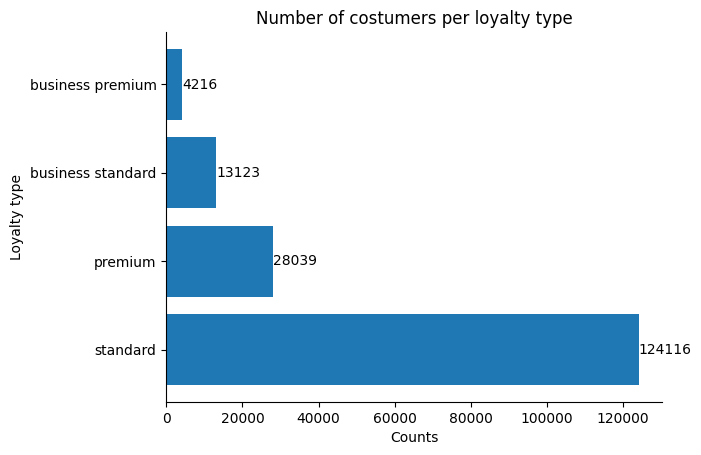

In [ ]:
fig, ax = plt.subplots()
bars = ax.barh(counts.index,counts)

ax.bar_label(bars)
plt.xlabel('Counts')
plt.ylabel('Loyalty type')
plt.title('Number of costumers per loyalty type')
ax.spines[['right', 'top']].set_visible(False)
plt.show()

The majority of the customers have a loyalty type equals to standard while the business_premium type represents the minority

I merge the previous dataset containing the info about customer with the latter which contains informations about the customers accounts.

In [ ]:
dfcostumer = pd.merge(df, customer_accounts, on=['customer_id'])

In [ ]:
dfcostumer['customer_id']=dfcostumer['customer_id'].astype(str)

# Costumer review

The dataset 'Customer review' contains 105710 reviews made by the customers.

In [ ]:
customer_reviews.info()
customer_reviews.isna().sum()
customer_reviews=customer_reviews.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105710 entries, 0 to 105709
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    105710 non-null  int64 
 1   customer_id  105710 non-null  int64 
 2   review_text  105710 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


In [ ]:
customer_reviews.customer_id.nunique()

105710

There are no situation in which a customer has made more than one review

The dataset customer review does not contain missing values

I transform the variables to a string format

In [ ]:
customer_reviews['review_id']=customer_reviews['review_id'].astype(str)
customer_reviews['customer_id']=customer_reviews['customer_id'].astype(str)
customer_reviews['review_text']= customer_reviews['review_text'].astype(str)


In [ ]:
customer_reviews

,review_id,customer_id,review_text
0,1,814256,I have bought several of the Vitality canned d...
1,2,457475,Product arrived labeled as Jumbo Salted Peanut...
2,3,104045,This is a confection that has been around a fe...
3,4,603662,If you are looking for the secret ingredient i...
4,5,739314,Great taffy at a great price. There was a wid...
...,...,...,...
105705,140942,224091,"We Love,Love our Keurig coffee maker .My husba..."
105706,140943,196666,This is supposed to be a light roast coffee bu...
105707,140944,618226,I have always been happy with my Kcups but thi...
105708,140945,844918,I ordered light roast coffee and was sent one ...


# Labelled reviews

The dataset 'Labelled reviews' contains information about 462744 reviews with the associated sentiment label. In fact, the review can express a positive, negative or neutral sentiment. I drop possible duplicates.

In [ ]:
labelled_reviews.info()
labelled_reviews=labelled_reviews.drop_duplicates()
labelled_reviews.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462744 entries, 0 to 462743
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   labelled_reviews_index  462744 non-null  int64 
 1   review_text             462744 non-null  object
 2   sentiment_label         462744 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.6+ MB


labelled_reviews_index    0
review_text               0
sentiment_label           0
dtype: int64

The dataset does not contain missing values

In [ ]:
countsreview=labelled_reviews.sentiment_label.value_counts()
countsreview

positive    297008
neutral     123386
negative     42350
Name: sentiment_label, dtype: int64

The most of the reviews express a positive sentiment. The negative reviews are the minority.

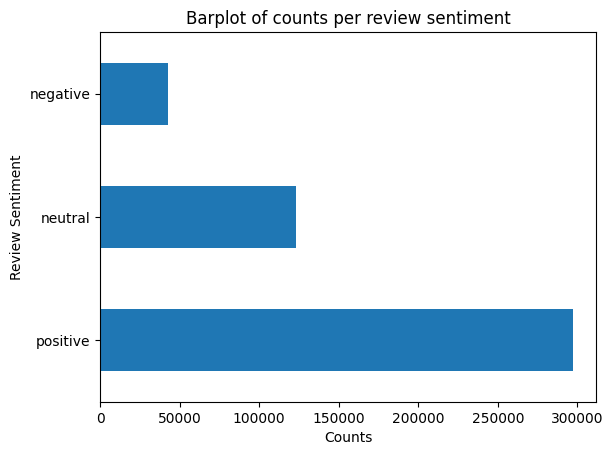

In [ ]:
countsreview.plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Review Sentiment')
plt.title('Barplot of counts per review sentiment')
plt.show()

I transform the variables into a string format

In [ ]:
labelled_reviews['labelled_reviews_index']=labelled_reviews['labelled_reviews_index'].astype(str)
labelled_reviews['review_text']=labelled_reviews['review_text'].astype(str)
labelled_reviews['sentiment_label']= labelled_reviews['sentiment_label'].astype(str)


# Product

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88538 entries, 0 to 88537
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   product_id     88538 non-null  int64
 1   product_class  88538 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


This dataset refers to 88538 instances of product represented by
the product_id and the product_class.

In [ ]:
products
products=products.drop_duplicates()
products.isna().sum()


product_id       0
product_class    0
dtype: int64

the dataset does not contain missing values

In [ ]:
products.product_class.value_counts()

12    13893
9     13325
7      9974
10     9845
3      7326
11     6690
4      5945
13     5283
2      4105
6      3340
5      2528
8      2241
1      2203
14     1840
Name: product_class, dtype: int64

 Most of the products belong to the class 12.

I convert the variables to string

In [ ]:
products['product_id']=products['product_id'].astype(str)
products['product_class']=products['product_class'].astype(str)


# Orders

This dataset refers to orders that have been made by customers. In particular there are seven variables that indicates :the order_id, the costumer_id,the store_id, the product_id, the direction(purchase or refund), the gross price, the price reduction and the purchase date.

In [ ]:
orders=orders.drop_duplicates()
orders.info()
orders.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 917000 entries, 0 to 1039864
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           917000 non-null  object 
 1   customer_id        917000 non-null  int64  
 2   store_id           917000 non-null  int64  
 3   product_id         917000 non-null  int64  
 4   direction          917000 non-null  int64  
 5   gross_price        917000 non-null  float64
 6   price_reduction    917000 non-null  float64
 7   purchase_datetime  917000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 63.0+ MB


order_id             0
customer_id          0
store_id             0
product_id           0
direction            0
gross_price          0
price_reduction      0
purchase_datetime    0
dtype: int64

The dataset does not contains missing values

I convert the variables order_id, store_id, product_id and direction into a string format.

In [ ]:
orders['order_id']=orders['customer_id'].astype(str)
orders['store_id']=orders['store_id'].astype(str)
orders['product_id']= orders['product_id'].astype(str)
orders['direction']=orders['direction'].astype(str)

The variable purchase_datetime it has been converted into a date format

In [ ]:
orders['purchase_datetime']=pd.to_datetime(orders['purchase_datetime'])

In [ ]:
orders.purchase_datetime.min()

Timestamp('2022-05-01 07:19:05')

The first date in terms of orders is 2022-05-01.

In [ ]:
orders.purchase_datetime.max()

Timestamp('2023-04-30 21:11:41')

The last date is 2023-04-30

This dataset takes into account the orders maded by customers in a range of time that varies from the 01-05-2022 to 30-04-2023.

In [ ]:
orders.direction.value_counts()

1     886281
-1     30719
Name: direction, dtype: int64

The variable direction express if the products have been purchased(1) or refunded(-1). As we can see from the results, the most of the products have been purchased.

In [ ]:
len(orders.customer_id.unique())

104134

The number of unique costumer_id is lower than the total number of rows of the dataset order. This means that in the dataset order the customers made more than one transaction.

In [ ]:
orders[orders.direction=="1"].gross_price.median()

5.49

The median value for gross_price is 5.49( considering only the purchases).

I merge the dataset containing informations about the product with the one containing the list of the orders.

In [ ]:
prod_ord=pd.merge(orders,products,on=['product_id'],how="left")

In [ ]:
prod_ord['customer_id']=prod_ord['customer_id'].astype(str)

In [ ]:
prod_ord

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
0,23,23,49,35551922,1,125.40,0.0,2022-10-04 18:28:51,6
1,23,23,49,30344384,1,8.30,0.0,2022-10-04 18:28:51,6
2,23,23,49,33794292,1,1.99,0.0,2022-10-04 18:28:51,6
3,23,23,49,33795776,1,5.10,0.0,2022-10-04 18:28:51,6
4,23,23,49,36235381,1,76.05,0.0,2022-10-04 18:28:51,6
...,...,...,...,...,...,...,...,...,...
916995,934581,934581,29,35508942,1,33.60,0.0,2023-04-30 19:35:53,2
916996,934620,934620,44,36237691,1,11.99,0.0,2023-04-30 19:19:55,13
916997,934620,934620,44,81259479,1,9.99,0.0,2023-04-30 19:19:55,13
916998,934660,934660,46,34067775,1,1.90,0.0,2023-04-30 19:32:17,9


# Costumer-Orders Dataset

I create a new dataset that contains the information on the customers associated with their orders. It is useful for the subsequent analysis.

In [ ]:
customer_orders=pd.merge(prod_ord,dfcostumer,on=['customer_id'])

In [ ]:
customer_orders

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,address_id,...,flag_privacy,postal_code,district,region,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,loyalty_status
0,23,23,49,35551922,1,125.40,0.0,2022-10-04 18:28:51,6,21,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,1
1,23,23,49,30344384,1,8.30,0.0,2022-10-04 18:28:51,6,21,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,1
2,23,23,49,33794292,1,1.99,0.0,2022-10-04 18:28:51,6,21,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,1
3,23,23,49,33795776,1,5.10,0.0,2022-10-04 18:28:51,6,21,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,1
4,23,23,49,36235381,1,76.05,0.0,2022-10-04 18:28:51,6,21,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910621,934581,934581,29,35508942,1,33.60,0.0,2023-04-30 19:35:53,2,899757,...,True,24.0,RM,LAZIO,927773,29,standard,1,2023-04-30,1
910622,934620,934620,44,36237691,1,11.99,0.0,2023-04-30 19:19:55,13,899796,...,True,30030.0,VE,VENETO,927816,44,standard,1,2023-04-30,1
910623,934620,934620,44,81259479,1,9.99,0.0,2023-04-30 19:19:55,13,899796,...,True,30030.0,VE,VENETO,927816,44,standard,1,2023-04-30,1
910624,934660,934660,46,34067775,1,1.90,0.0,2023-04-30 19:32:17,9,899836,...,True,70010.0,BA,PUGLIA,927866,46,standard,1,2023-04-30,1


In [ ]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910626 entries, 0 to 910625
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             910626 non-null  object        
 1   customer_id          910626 non-null  object        
 2   store_id             910626 non-null  object        
 3   product_id           910626 non-null  object        
 4   direction            910626 non-null  object        
 5   gross_price          910626 non-null  float64       
 6   price_reduction      910626 non-null  float64       
 7   purchase_datetime    910626 non-null  datetime64[ns]
 8   product_class        910626 non-null  object        
 9   address_id           910626 non-null  object        
 10  birthdate            910626 non-null  datetime64[ns]
 11  gender               910626 non-null  object        
 12  job_type             910626 non-null  object        
 13  email_provider

I save these new versions that I need for the analysis(RFM,MBA,Churn,Sentiment Analysis)

In [ ]:
customer_orders.to_csv('/content/gdrive/MyDrive/customer_orders.csv', index=False)
dfcostumer.to_csv('/content/gdrive/MyDrive/df_customer.csv', index=False)
prod_ord.to_csv('/content/gdrive/MyDrive/prod_ord.csv', index=False)
customer_reviews.to_csv('/content/gdrive/MyDrive/customer_reviews.csv', index=False)
labelled_reviews.to_csv('/content/gdrive/MyDrive/labelled_reviews.csv', index=False)